In [1]:
import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()

'C:\\Spark\\spark-3.0.0-preview2-bin-hadoop2.7'

#### Start a new Spark Session

In [2]:
%%time
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
conf = pyspark.SparkConf().setAppName('appName').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)

Wall time: 9.88 s


#### Read the original Data

In [3]:
df = spark.read.option("header",True).csv("D:\\saahi\\OneDrive\\Documents\\INFOSYS 722\\Project\\sdes343_assignment 4\\AirQualityUCI.csv")

In [4]:
df.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- CO(GT): string (nullable = true)
 |-- PT08.S1(CO): string (nullable = true)
 |-- NMHC(GT): string (nullable = true)
 |-- C6H6(GT): string (nullable = true)
 |-- PT08.S2(NMHC): string (nullable = true)
 |-- NOx(GT): string (nullable = true)
 |-- PT08.S3(NOx): string (nullable = true)
 |-- NO2(GT): string (nullable = true)
 |-- PT08.S4(NO2): string (nullable = true)
 |-- PT08.S5(O3): string (nullable = true)
 |-- T: string (nullable = true)
 |-- RH: string (nullable = true)
 |-- AH: string (nullable = true)



In [5]:
df.toPandas().head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,03/10/04,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,03/10/04,19:00:00,2,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,03/10/04,20:00:00,2.2,1402,88,9,939,131,1140,114,1555,1074,11.9,54,0.7502
3,03/10/04,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11,60,0.7867
4,03/10/04,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [6]:
df.count()

9357

In [7]:
df.dtypes

[('Date', 'string'),
 ('Time', 'string'),
 ('CO(GT)', 'string'),
 ('PT08.S1(CO)', 'string'),
 ('NMHC(GT)', 'string'),
 ('C6H6(GT)', 'string'),
 ('PT08.S2(NMHC)', 'string'),
 ('NOx(GT)', 'string'),
 ('PT08.S3(NOx)', 'string'),
 ('NO2(GT)', 'string'),
 ('PT08.S4(NO2)', 'string'),
 ('PT08.S5(O3)', 'string'),
 ('T', 'string'),
 ('RH', 'string'),
 ('AH', 'string')]

In [8]:
from pyspark.sql.types import *
import pandas as pd
from pyspark.sql.functions import *

#### Correct column data types

In [9]:
df = (df.withColumn("tmp",to_date(unix_timestamp(col("Date"),'MM/dd/yy').cast("Timestamp"))).drop("Date").withColumnRenamed("tmp","Date")
      .withColumn("tmp1",df["Time"].cast(TimestampType())).drop("Time").withColumnRenamed("tmp1","Time")
      .withColumn("tmp2",df["CO(GT)"].cast(FloatType())).drop("CO(GT)").withColumnRenamed("tmp2","CO(GT)")
      .withColumn("tmp3",df["`PT08.S1(CO)`"].cast(FloatType())).drop("PT08.S1(CO)").withColumnRenamed("tmp3","PT08.S1(CO)")
      .withColumn("tmp4",df["NMHC(GT)"].cast(FloatType())).drop("NMHC(GT)").withColumnRenamed("tmp4","NMHC(GT)")
      .withColumn("tmp5",df["C6H6(GT)"].cast(FloatType())).drop("C6H6(GT)").withColumnRenamed("tmp5","C6H6(GT)")
      .withColumn("tmp6",df["`PT08.S2(NMHC)`"].cast(FloatType())).drop("PT08.S2(NMHC)").withColumnRenamed("tmp6","PT08.S2(NMHC)")
      .withColumn("tmp7",df["NOx(GT)"].cast(FloatType())).drop("NOx(GT)").withColumnRenamed("tmp7","NOx(GT)")
      .withColumn("tmp8",df["`PT08.S3(NOx)`"].cast(FloatType())).drop("PT08.S3(NOx)").withColumnRenamed("tmp8","PT08.S3(NOx)")
      .withColumn("tmp9",df["NO2(GT)"].cast(FloatType())).drop("NO2(GT)").withColumnRenamed("tmp9","NO2(GT)")
      .withColumn("tmp10",df["`PT08.S4(NO2)`"].cast(FloatType())).drop("PT08.S4(NO2)").withColumnRenamed("tmp10","PT08.S4(NO2)")
      .withColumn("tmp11",df["`PT08.S5(O3)`"].cast(FloatType())).drop("PT08.S5(O3)").withColumnRenamed("tmp11","PT08.S5(O3)")
      .withColumn("tmp12",df["T"].cast(FloatType())).drop("T").withColumnRenamed("tmp12","T")
      .withColumn("tmp13",df["RH"].cast(FloatType())).drop("RH").withColumnRenamed("tmp13","RH")
      .withColumn("tmp14",df["AH"].cast(FloatType())).drop("AH").withColumnRenamed("tmp14","AH")
     )


In [10]:
df.dtypes

[('Date', 'date'),
 ('Time', 'timestamp'),
 ('CO(GT)', 'float'),
 ('PT08.S1(CO)', 'float'),
 ('NMHC(GT)', 'float'),
 ('C6H6(GT)', 'float'),
 ('PT08.S2(NMHC)', 'float'),
 ('NOx(GT)', 'float'),
 ('PT08.S3(NOx)', 'float'),
 ('NO2(GT)', 'float'),
 ('PT08.S4(NO2)', 'float'),
 ('PT08.S5(O3)', 'float'),
 ('T', 'float'),
 ('RH', 'float'),
 ('AH', 'float')]

In [11]:
df.toPandas().head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,2020-06-11 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.900002,0.7578
1,2004-03-10,2020-06-11 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.700001,0.7255
2,2004-03-10,2020-06-11 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.000000,0.7502
3,2004-03-10,2020-06-11 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.000000,0.7867
4,2004-03-10,2020-06-11 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.599998,0.7888


In [12]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
CO(GT),9357,-34.20752377999753,77.65717034633698,-200.0,11.9
PT08.S1(CO),9357,1048.9900609169606,329.8327098861879,-200.0,2040.0
NMHC(GT),9357,-159.09009297851875,139.78909289678126,-200.0,1189.0
C6H6(GT),9357,1.8656834460141198,41.380206436190804,-200.0,63.7
PT08.S2(NMHC),9357,894.5952762637597,342.3332516496716,-200.0,2214.0
NOx(GT),9357,168.6169712514695,257.4338662910734,-200.0,1479.0
PT08.S3(NOx),9357,794.9901677888212,321.99355160311546,-200.0,2683.0
NO2(GT),9357,58.14887250187026,126.94045525890763,-200.0,340.0
PT08.S4(NO2),9357,1391.4796409105481,467.2101245570624,-200.0,2775.0


#### Plot distributions of all columns

In [13]:
CO_GT_histogram = df.select('CO(GT)').rdd.flatMap(lambda x: x).histogram(11)
CO_GT_histogram

([-200.0,
  -180.7363636710427,
  -161.47272734208542,
  -142.2090910131281,
  -122.94545468417081,
  -103.68181835521352,
  -84.41818202625622,
  -65.15454569729891,
  -45.890909368341624,
  -26.627273039384335,
  -7.363636710427045,
  11.899999618530273],
 [1683, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7674])

In [14]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*CO_GT_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

In [15]:
PT08S1_CO_histogram = df.select('`PT08.S1(CO)`').rdd.flatMap(lambda x: x).histogram(11)
PT08S1_CO_histogram

([-200.0,
  3.636363636363626,
  207.27272727272725,
  410.9090909090909,
  614.5454545454545,
  818.1818181818181,
  1021.8181818181818,
  1225.4545454545455,
  1429.090909090909,
  1632.7272727272725,
  1836.3636363636363,
  2040.0],
 [366, 0, 0, 0, 526, 3242, 2927, 1491, 650, 132, 23])

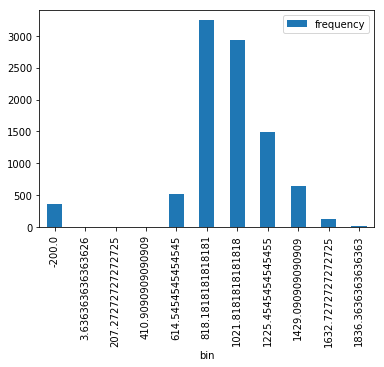

In [16]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*PT08S1_CO_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

In [17]:
NMHC_GT_histogram = df.select('NMHC(GT)').rdd.flatMap(lambda x: x).histogram(11)
NMHC_GT_histogram

([-200.0,
  -73.72727272727273,
  52.54545454545453,
  178.8181818181818,
  305.09090909090907,
  431.3636363636364,
  557.6363636363636,
  683.9090909090909,
  810.1818181818181,
  936.4545454545455,
  1062.7272727272727,
  1189.0],
 [8443, 154, 366, 177, 71, 71, 35, 25, 10, 2, 3])

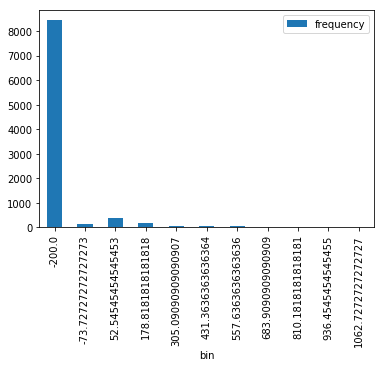

In [18]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*NMHC_GT_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

In [19]:
C6H6_GT_histogram = df.select('C6H6(GT)').rdd.flatMap(lambda x: x).histogram(11)
C6H6_GT_histogram

([-200.0,
  -176.02727265791458,
  -152.0545453158292,
  -128.0818179737438,
  -104.10909063165838,
  -80.13636328957297,
  -56.16363594748756,
  -32.19090860540217,
  -8.218181263316751,
  15.75454607876867,
  39.72727342085406,
  63.70000076293945],
 [366, 0, 0, 0, 0, 0, 0, 0, 7251, 1707, 33])

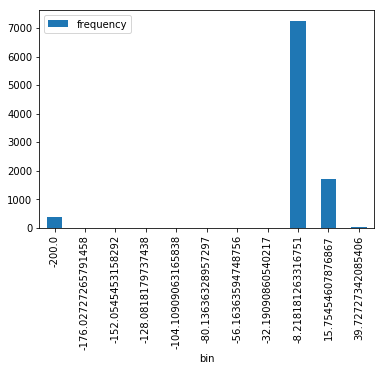

In [20]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*C6H6_GT_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

In [21]:
PT08S2_NMHC_histogram = df.select('`PT08.S2(NMHC)`').rdd.flatMap(lambda x: x).histogram(11)
PT08S2_NMHC_histogram

([-200.0,
  19.454545454545467,
  238.90909090909093,
  458.3636363636364,
  677.8181818181819,
  897.2727272727273,
  1116.7272727272727,
  1336.1818181818182,
  1555.6363636363637,
  1775.0909090909092,
  1994.5454545454545,
  2214.0],
 [366, 0, 72, 1490, 2787, 2396, 1496, 572, 147, 29, 2])

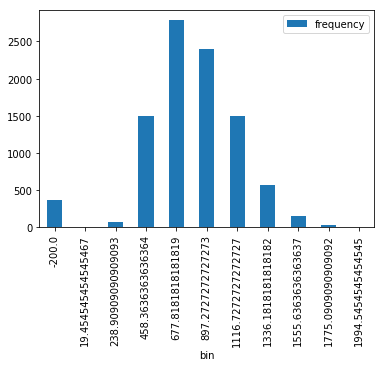

In [22]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*PT08S2_NMHC_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

In [23]:
NOx_GT_histogram = df.select('NOx(GT)').rdd.flatMap(lambda x: x).histogram(11)
NOx_GT_histogram

([-200.0,
  -47.363636363636374,
  105.27272727272725,
  257.9090909090909,
  410.5454545454545,
  563.1818181818181,
  715.8181818181818,
  868.4545454545455,
  1021.090909090909,
  1173.7272727272725,
  1326.3636363636363,
  1479.0],
 [1639, 2146, 2918, 1307, 632, 369, 194, 84, 39, 23, 6])

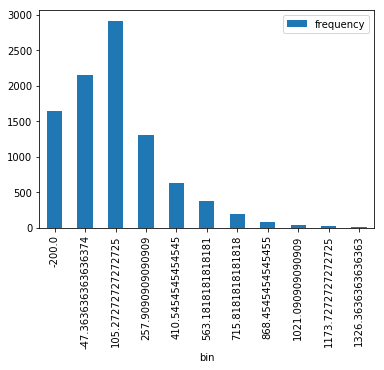

In [24]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*NOx_GT_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

In [25]:
PT08S3_NOx_histogram = df.select('`PT08.S3(NOx)`').rdd.flatMap(lambda x: x).histogram(11)
PT08S3_NOx_histogram

([-200.0,
  62.090909090909065,
  324.18181818181813,
  586.2727272727273,
  848.3636363636363,
  1110.4545454545453,
  1372.5454545454545,
  1634.6363636363635,
  1896.7272727272725,
  2158.8181818181815,
  2420.9090909090905,
  2683.0],
 [366, 1, 1392, 3774, 2677, 833, 214, 69, 24, 4, 3])

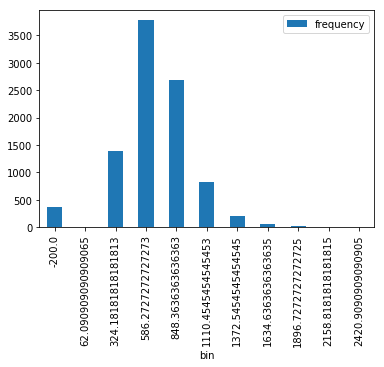

In [26]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*PT08S3_NOx_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

In [27]:
NO2_GT_histogram = df.select('NO2(GT)').rdd.flatMap(lambda x: x).histogram(11)
NO2_GT_histogram

([-200.0,
  -150.9090909090909,
  -101.81818181818181,
  -52.72727272727272,
  -3.636363636363626,
  45.45454545454547,
  94.54545454545456,
  143.63636363636363,
  192.72727272727275,
  241.81818181818187,
  290.90909090909093,
  340.0],
 [1642, 0, 0, 0, 459, 2451, 2945, 1360, 407, 81, 12])

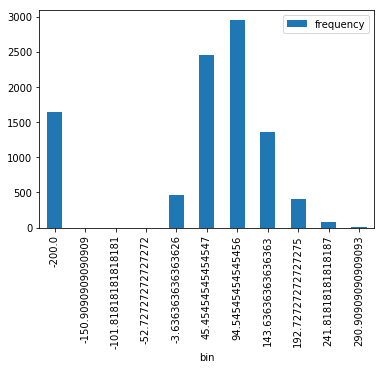

In [28]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*NO2_GT_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

In [29]:
PT08S4_NO2_histogram = df.select('`PT08.S4(NO2)`').rdd.flatMap(lambda x: x).histogram(11)
PT08S4_NO2_histogram

([-200.0,
  70.45454545454544,
  340.9090909090909,
  611.3636363636363,
  881.8181818181818,
  1152.2727272727273,
  1422.7272727272725,
  1693.181818181818,
  1963.6363636363635,
  2234.090909090909,
  2504.5454545454545,
  2775.0],
 [366, 0, 7, 436, 1340, 2307, 2825, 1435, 476, 129, 36])

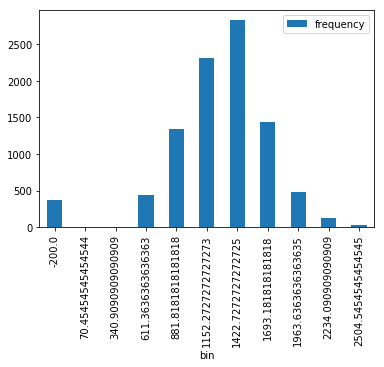

In [30]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*PT08S4_NO2_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

In [31]:
PT08S5_O3_histogram = df.select('`PT08.S5(O3)`').rdd.flatMap(lambda x: x).histogram(11)
PT08S5_O3_histogram

([-200.0,
  47.54545454545453,
  295.09090909090907,
  542.6363636363636,
  790.1818181818181,
  1037.7272727272727,
  1285.2727272727273,
  1532.8181818181818,
  1780.3636363636363,
  2027.909090909091,
  2275.4545454545455,
  2523.0],
 [366, 30, 857, 1899, 2362, 1657, 1118, 650, 289, 102, 27])

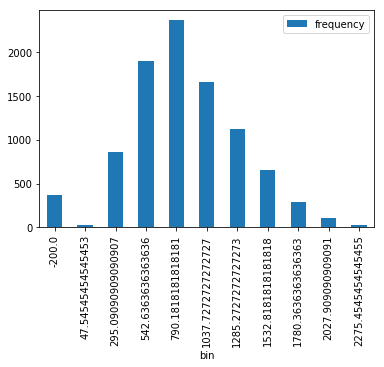

In [32]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*PT08S5_O3_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

In [33]:
T_histogram = df.select('T').rdd.flatMap(lambda x: x).histogram(11)
T_histogram

([-200.0,
  -177.76363650235263,
  -155.52727300470525,
  -133.2909095070579,
  -111.05454600941052,
  -88.81818251176314,
  -66.58181901411578,
  -44.345455516468405,
  -22.10909201882103,
  0.12727147882634426,
  22.36363497647372,
  44.599998474121094],
 [366, 0, 0, 0, 0, 0, 0, 0, 15, 6109, 2867])

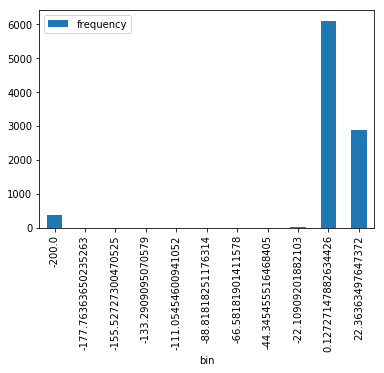

In [34]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*T_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

In [35]:
RH_histogram = df.select('RH').rdd.flatMap(lambda x: x).histogram(11)
RH_histogram

([-200.0,
  -173.754545731978,
  -147.50909146395597,
  -121.26363719593395,
  -95.01818292791194,
  -68.77272865988994,
  -42.527274391867905,
  -16.281820123845876,
  9.963634144176126,
  36.20908841219813,
  62.45454268022013,
  88.69999694824219],
 [366, 0, 0, 0, 0, 0, 0, 7, 2291, 4439, 2254])

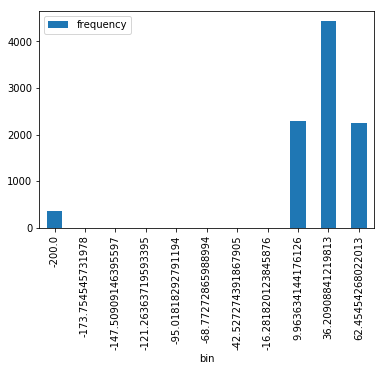

In [36]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*RH_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

In [37]:
AH_histogram = df.select('AH').rdd.flatMap(lambda x: x).histogram(11)
AH_histogram

([-200.0,
  -181.61536364121872,
  -163.2307272824374,
  -144.8460909236561,
  -126.46145456487483,
  -108.07681820609353,
  -89.69218184731224,
  -71.30754548853093,
  -52.922909129749655,
  -34.538272770968376,
  -16.15363641218707,
  2.2309999465942383],
 [366, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8991])

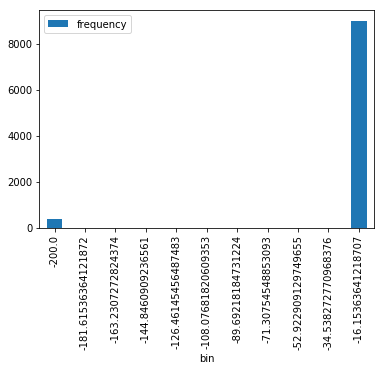

In [38]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*AH_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

#### Read the cleaned data with -200 converted to nan

In [39]:
df = spark.read.option("header",True).csv("D:\\saahi\\OneDrive\\Documents\\INFOSYS 722\\Project\\sdes343_assignment 4\\AirQualityUCI_na.csv")

In [40]:
df.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- CO(GT): string (nullable = true)
 |-- PT08.S1(CO): string (nullable = true)
 |-- NMHC(GT): string (nullable = true)
 |-- C6H6(GT): string (nullable = true)
 |-- PT08.S2(NMHC): string (nullable = true)
 |-- NOx(GT): string (nullable = true)
 |-- PT08.S3(NOx): string (nullable = true)
 |-- NO2(GT): string (nullable = true)
 |-- PT08.S4(NO2): string (nullable = true)
 |-- PT08.S5(O3): string (nullable = true)
 |-- T: string (nullable = true)
 |-- RH: string (nullable = true)
 |-- AH: string (nullable = true)



In [41]:
df.toPandas().head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,03/10/04,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,03/10/04,19:00:00,2,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,03/10/04,20:00:00,2.2,1402,88,9,939,131,1140,114,1555,1074,11.9,54,0.7502
3,03/10/04,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11,60,0.7867
4,03/10/04,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [42]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Date,9357,None,None,01/01/05,12/31/04
Time,9357,None,None,00:00:00,23:00:00
CO(GT),9357,NaN,NaN,0.1,Nan
PT08.S1(CO),9357,NaN,NaN,1000,Nan
NMHC(GT),9357,NaN,NaN,10,Nan
C6H6(GT),9357,NaN,NaN,0.1,Nan
PT08.S2(NMHC),9357,NaN,NaN,1000,Nan
NOx(GT),9357,NaN,NaN,10,Nan
PT08.S3(NOx),9357,NaN,NaN,1000,Nan


#### Drop the Relative Humuidity and Absolute Humidity variables

In [43]:
df = df.drop('RH')
df = df.drop('AH')

In [44]:
df = (df.withColumn("tmp",to_date(unix_timestamp(col("Date"),'M/dd/yy').cast("Timestamp"))).drop("Date").withColumnRenamed("tmp","Date")
      .withColumn("tmp1",df["Time"].cast(TimestampType())).drop("Time").withColumnRenamed("tmp1","Time")
      .withColumn("tmp2",df["CO(GT)"].cast(FloatType())).drop("CO(GT)").withColumnRenamed("tmp2","CO(GT)")
      .withColumn("tmp3",df["`PT08.S1(CO)`"].cast(FloatType())).drop("PT08.S1(CO)").withColumnRenamed("tmp3","PT08S1(CO)")
      .withColumn("tmp4",df["NMHC(GT)"].cast(FloatType())).drop("NMHC(GT)").withColumnRenamed("tmp4","NMHC(GT)")
      .withColumn("tmp5",df["C6H6(GT)"].cast(FloatType())).drop("C6H6(GT)").withColumnRenamed("tmp5","C6H6(GT)")
      .withColumn("tmp6",df["`PT08.S2(NMHC)`"].cast(FloatType())).drop("PT08.S2(NMHC)").withColumnRenamed("tmp6","PT08S2(NMHC)")
      .withColumn("tmp7",df["NOx(GT)"].cast(FloatType())).drop("NOx(GT)").withColumnRenamed("tmp7","NOx(GT)")
      .withColumn("tmp8",df["`PT08.S3(NOx)`"].cast(FloatType())).drop("PT08.S3(NOx)").withColumnRenamed("tmp8","PT08S3(NOx)")
      .withColumn("tmp9",df["NO2(GT)"].cast(FloatType())).drop("NO2(GT)").withColumnRenamed("tmp9","NO2(GT)")
      .withColumn("tmp10",df["`PT08.S4(NO2)`"].cast(FloatType())).drop("PT08.S4(NO2)").withColumnRenamed("tmp10","PT08S4(NO2)")
      .withColumn("tmp11",df["`PT08.S5(O3)`"].cast(FloatType())).drop("PT08.S5(O3)").withColumnRenamed("tmp11","PT08S5(O3)")
      .withColumn("tmp12",df["T"].cast(FloatType())).drop("T").withColumnRenamed("tmp12","T")
     )


In [45]:
df.dtypes

[('Date', 'date'),
 ('Time', 'timestamp'),
 ('CO(GT)', 'float'),
 ('PT08S1(CO)', 'float'),
 ('NMHC(GT)', 'float'),
 ('C6H6(GT)', 'float'),
 ('PT08S2(NMHC)', 'float'),
 ('NOx(GT)', 'float'),
 ('PT08S3(NOx)', 'float'),
 ('NO2(GT)', 'float'),
 ('PT08S4(NO2)', 'float'),
 ('PT08S5(O3)', 'float'),
 ('T', 'float')]

In [46]:
df.toPandas().head()

,Date,Time,CO(GT),PT08S1(CO),NMHC(GT),C6H6(GT),PT08S2(NMHC),NOx(GT),PT08S3(NOx),NO2(GT),PT08S4(NO2),PT08S5(O3),T
0,2004-03-10,2020-06-11 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6
1,2004-03-10,2020-06-11 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3
2,2004-03-10,2020-06-11 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9
3,2004-03-10,2020-06-11 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0
4,2004-03-10,2020-06-11 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2


In [47]:
df.columns

['Date',
 'Time',
 'CO(GT)',
 'PT08S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08S2(NMHC)',
 'NOx(GT)',
 'PT08S3(NOx)',
 'NO2(GT)',
 'PT08S4(NO2)',
 'PT08S5(O3)',
 'T']

#### Count number of missing values in each column

In [48]:
df_1 = df.drop('Date')
df_1 = df_1.drop('Time')

In [49]:
df_1.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_1.columns]).show()

+------+----------+--------+--------+------------+-------+-----------+-------+-----------+----------+---+
|CO(GT)|PT08S1(CO)|NMHC(GT)|C6H6(GT)|PT08S2(NMHC)|NOx(GT)|PT08S3(NOx)|NO2(GT)|PT08S4(NO2)|PT08S5(O3)|  T|
+------+----------+--------+--------+------------+-------+-----------+-------+-----------+----------+---+
|  1683|       366|    8443|     366|         366|   1639|        366|   1642|        366|       366|366|
+------+----------+--------+--------+------------+-------+-----------+-------+-----------+----------+---+



#### Drop the NMHC(GT) column

In [50]:
df = df.drop('NMHC(GT)')

In [51]:
df.show(5)

+----------+-------------------+------+----------+--------+------------+-------+-----------+-------+-----------+----------+----+
|      Date|               Time|CO(GT)|PT08S1(CO)|C6H6(GT)|PT08S2(NMHC)|NOx(GT)|PT08S3(NOx)|NO2(GT)|PT08S4(NO2)|PT08S5(O3)|   T|
+----------+-------------------+------+----------+--------+------------+-------+-----------+-------+-----------+----------+----+
|2004-03-10|2020-06-11 18:00:00|   2.6|    1360.0|    11.9|      1046.0|  166.0|     1056.0|  113.0|     1692.0|    1268.0|13.6|
|2004-03-10|2020-06-11 19:00:00|   2.0|    1292.0|     9.4|       955.0|  103.0|     1174.0|   92.0|     1559.0|     972.0|13.3|
|2004-03-10|2020-06-11 20:00:00|   2.2|    1402.0|     9.0|       939.0|  131.0|     1140.0|  114.0|     1555.0|    1074.0|11.9|
|2004-03-10|2020-06-11 21:00:00|   2.2|    1376.0|     9.2|       948.0|  172.0|     1092.0|  122.0|     1584.0|    1203.0|11.0|
|2004-03-10|2020-06-11 22:00:00|   1.6|    1272.0|     6.5|       836.0|  131.0|     1205.0|  116

#### Drop the 366 rows with missing values

In [52]:
df = df.na.drop(how='any', subset=['C6H6(GT)'])

In [53]:
df_1 = df.drop('Date','Time')

In [54]:
df_1.count()

8991

In [55]:
df_1.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_1.columns]).show()

+------+----------+--------+------------+-------+-----------+-------+-----------+----------+---+
|CO(GT)|PT08S1(CO)|C6H6(GT)|PT08S2(NMHC)|NOx(GT)|PT08S3(NOx)|NO2(GT)|PT08S4(NO2)|PT08S5(O3)|  T|
+------+----------+--------+------------+-------+-----------+-------+-----------+----------+---+
|  1647|         0|       0|           0|   1595|          0|   1598|          0|         0|  0|
+------+----------+--------+------------+-------+-----------+-------+-----------+----------+---+



#### Impute missing values with the mean

In [56]:
df_1 = df.drop('Date','Time')

In [57]:
from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols=df_1.columns, 
    outputCols=["{}_imputed".format(c) for c in df_1.columns]
)
df_2 = imputer.fit(df_1).transform(df_1)

In [58]:
df_2 = df_2.drop('CO(GT)',
 'PT08S1(CO)',
 'C6H6(GT)',
 'PT08S2(NMHC)',
 'NOx(GT)',
 'PT08S3(NOx)',
 'NO2(GT)',
 'PT08S4(NO2)',
 'PT08S5(O3)',
 'T',)

In [59]:
df_2.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_2.columns]).toPandas().transpose()

,0
T_imputed,0
NOx(GT)_imputed,0
PT08S4(NO2)_imputed,0
PT08S5(O3)_imputed,0
PT08S2(NMHC)_imputed,0
C6H6(GT)_imputed,0
PT08S1(CO)_imputed,0
PT08S3(NOx)_imputed,0
NO2(GT)_imputed,0
CO(GT)_imputed,0


In [60]:
df_1 = (df_2.withColumn("tmp2",df_2["CO(GT)_imputed"]).drop("CO(GT)_imputed").withColumnRenamed("tmp2","CO(GT)")
      .withColumn("tmp3",df_2["PT08S1(CO)_imputed"]).drop("PT08S1(CO)_imputed").withColumnRenamed("tmp3","PT08S1(CO)")
      .withColumn("tmp5",df_2["C6H6(GT)_imputed"]).drop("C6H6(GT)_imputed").withColumnRenamed("tmp5","C6H6(GT)")
      .withColumn("tmp6",df_2["PT08S2(NMHC)_imputed"]).drop("PT08S2(NMHC)_imputed").withColumnRenamed("tmp6","PT08S2(NMHC)")
      .withColumn("tmp7",df_2["NOx(GT)_imputed"]).drop("NOx(GT)_imputed").withColumnRenamed("tmp7","NOx(GT)")
      .withColumn("tmp8",df_2["PT08S3(NOx)_imputed"]).drop("PT08S3(NOx)_imputed").withColumnRenamed("tmp8","PT08S3(NOx)")
      .withColumn("tmp9",df_2["NO2(GT)_imputed"]).drop("NO2(GT)_imputed").withColumnRenamed("tmp9","NO2(GT)")
      .withColumn("tmp10",df_2["PT08S4(NO2)_imputed"]).drop("PT08S4(NO2)_imputed").withColumnRenamed("tmp10","PT08S4(NO2)")
      .withColumn("tmp11",df_2["PT08S5(O3)_imputed"]).drop("PT08S5(O3)_imputed").withColumnRenamed("tmp11","PT08S5(O3)")
      .withColumn("tmp12",df_2["T_imputed"]).drop("T_imputed").withColumnRenamed("tmp12","T")
     )

In [61]:
df_1.show()

+---------+----------+--------+------------+---------+-----------+----------+-----------+----------+----+
|   CO(GT)|PT08S1(CO)|C6H6(GT)|PT08S2(NMHC)|  NOx(GT)|PT08S3(NOx)|   NO2(GT)|PT08S4(NO2)|PT08S5(O3)|   T|
+---------+----------+--------+------------+---------+-----------+----------+-----------+----------+----+
|      2.6|    1360.0|    11.9|      1046.0|    166.0|     1056.0|     113.0|     1692.0|    1268.0|13.6|
|      2.0|    1292.0|     9.4|       955.0|    103.0|     1174.0|      92.0|     1559.0|     972.0|13.3|
|      2.2|    1402.0|     9.0|       939.0|    131.0|     1140.0|     114.0|     1555.0|    1074.0|11.9|
|      2.2|    1376.0|     9.2|       948.0|    172.0|     1092.0|     122.0|     1584.0|    1203.0|11.0|
|      1.6|    1272.0|     6.5|       836.0|    131.0|     1205.0|     116.0|     1490.0|    1110.0|11.2|
|      1.2|    1197.0|     4.7|       750.0|     89.0|     1337.0|      96.0|     1393.0|     949.0|11.2|
|      1.2|    1185.0|     3.6|       690.0|  

In [62]:
df_1.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_1.columns]).show()

+------+----------+--------+------------+-------+-----------+-------+-----------+----------+---+
|CO(GT)|PT08S1(CO)|C6H6(GT)|PT08S2(NMHC)|NOx(GT)|PT08S3(NOx)|NO2(GT)|PT08S4(NO2)|PT08S5(O3)|  T|
+------+----------+--------+------------+-------+-----------+-------+-----------+----------+---+
|     0|         0|       0|           0|      0|          0|      0|          0|         0|  0|
+------+----------+--------+------------+-------+-----------+-------+-----------+----------+---+



In [63]:
df_3 = df.select('Date','Time')

In [64]:
df_3.show()

+----------+-------------------+
|      Date|               Time|
+----------+-------------------+
|2004-03-10|2020-06-11 18:00:00|
|2004-03-10|2020-06-11 19:00:00|
|2004-03-10|2020-06-11 20:00:00|
|2004-03-10|2020-06-11 21:00:00|
|2004-03-10|2020-06-11 22:00:00|
|2004-03-10|2020-06-11 23:00:00|
|2004-03-11|2020-06-11 00:00:00|
|2004-03-11|2020-06-11 01:00:00|
|2004-03-11|2020-06-11 02:00:00|
|2004-03-11|2020-06-11 03:00:00|
|2004-03-11|2020-06-11 04:00:00|
|2004-03-11|2020-06-11 05:00:00|
|2004-03-11|2020-06-11 06:00:00|
|2004-03-11|2020-06-11 07:00:00|
|2004-03-11|2020-06-11 08:00:00|
|2004-03-11|2020-06-11 09:00:00|
|2004-03-11|2020-06-11 10:00:00|
|2004-03-11|2020-06-11 11:00:00|
|2004-03-11|2020-06-11 12:00:00|
|2004-03-11|2020-06-11 13:00:00|
+----------+-------------------+
only showing top 20 rows



In [65]:
df_1=df_1.withColumn('row_index', monotonically_increasing_id())
df_3=df_3.withColumn('row_index', monotonically_increasing_id())

In [66]:
df_1 = df_3.join(df_1, on=["row_index"]).sort("row_index").drop("row_index")

In [67]:
df_1.show(5)

+----------+-------------------+------+----------+--------+------------+-------+-----------+-------+-----------+----------+----+
|      Date|               Time|CO(GT)|PT08S1(CO)|C6H6(GT)|PT08S2(NMHC)|NOx(GT)|PT08S3(NOx)|NO2(GT)|PT08S4(NO2)|PT08S5(O3)|   T|
+----------+-------------------+------+----------+--------+------------+-------+-----------+-------+-----------+----------+----+
|2004-03-10|2020-06-11 18:00:00|   2.6|    1360.0|    11.9|      1046.0|  166.0|     1056.0|  113.0|     1692.0|    1268.0|13.6|
|2004-03-10|2020-06-11 19:00:00|   2.0|    1292.0|     9.4|       955.0|  103.0|     1174.0|   92.0|     1559.0|     972.0|13.3|
|2004-03-10|2020-06-11 20:00:00|   2.2|    1402.0|     9.0|       939.0|  131.0|     1140.0|  114.0|     1555.0|    1074.0|11.9|
|2004-03-10|2020-06-11 21:00:00|   2.2|    1376.0|     9.2|       948.0|  172.0|     1092.0|  122.0|     1584.0|    1203.0|11.0|
|2004-03-10|2020-06-11 22:00:00|   1.6|    1272.0|     6.5|       836.0|  131.0|     1205.0|  116

In [68]:
df_1.toPandas().to_csv("D:\\saahi\\OneDrive\\Documents\\INFOSYS 722\\Project\\sdes343_assignment 4\\AirQualityUCI_imputed.csv")

#### Extract month from the date

In [69]:
df_3 = df_1.select(month('Date'))
df_3 = df_3.withColumnRenamed("month(Date)","month")

In [70]:
df_1= df_1.drop('Date','Time')

In [71]:
df_1=df_1.withColumn('row_index', monotonically_increasing_id())
df_3=df_3.withColumn('row_index', monotonically_increasing_id())

In [72]:
df_1 = df_3.join(df_1, on=["row_index"]).sort("row_index").drop("row_index")

In [73]:
df_1.show(5)

+-----+------+----------+--------+------------+-------+-----------+-------+-----------+----------+----+
|month|CO(GT)|PT08S1(CO)|C6H6(GT)|PT08S2(NMHC)|NOx(GT)|PT08S3(NOx)|NO2(GT)|PT08S4(NO2)|PT08S5(O3)|   T|
+-----+------+----------+--------+------------+-------+-----------+-------+-----------+----------+----+
|    3|   2.6|    1360.0|    11.9|      1046.0|  166.0|     1056.0|  113.0|     1692.0|    1268.0|13.6|
|    3|   2.0|    1292.0|     9.4|       955.0|  103.0|     1174.0|   92.0|     1559.0|     972.0|13.3|
|    3|   2.2|    1402.0|     9.0|       939.0|  131.0|     1140.0|  114.0|     1555.0|    1074.0|11.9|
|    3|   2.2|    1376.0|     9.2|       948.0|  172.0|     1092.0|  122.0|     1584.0|    1203.0|11.0|
|    3|   1.6|    1272.0|     6.5|       836.0|  131.0|     1205.0|  116.0|     1490.0|    1110.0|11.2|
+-----+------+----------+--------+------------+-------+-----------+-------+-----------+----------+----+
only showing top 5 rows



In [74]:
df_1.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
month,8991,6.3277722166611055,3.4078535103652845,1,12
CO(GT),8991,2.1297113387863584,1.298236886836899,0.1,11.9
PT08S1(CO),8991,1099.8331664998332,217.0800372559752,647.0,2040.0
C6H6(GT),8991,10.083105328034048,7.4498196971340445,0.1,63.7
PT08S2(NMHC),8991,939.1533755978201,266.83142860197734,383.0,2214.0
NOx(GT),8991,242.18929040361704,187.11721564474973,2.0,1479.0
PT08S3(NOx),8991,835.4936047158269,256.8173200157979,322.0,2683.0
NO2(GT),8991,112.14513670198247,43.18907298526499,2.0,333.0
PT08S4(NO2),8991,1456.2645979312647,346.2067935273427,551.0,2775.0


In [75]:
df_1.count()

8991

In [76]:
df_1.dtypes

[('month', 'int'),
 ('CO(GT)', 'float'),
 ('PT08S1(CO)', 'float'),
 ('C6H6(GT)', 'float'),
 ('PT08S2(NMHC)', 'float'),
 ('NOx(GT)', 'float'),
 ('PT08S3(NOx)', 'float'),
 ('NO2(GT)', 'float'),
 ('PT08S4(NO2)', 'float'),
 ('PT08S5(O3)', 'float'),
 ('T', 'float')]

In [77]:
import six
for i in df_1.columns:
    if not( isinstance(df_1.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to T for ", i, df_1.stat.corr('T',i))

Correlation to T for  month 0.2829290925565167
Correlation to T for  CO(GT) 0.020050685717003663
Correlation to T for  PT08S1(CO) 0.048626758354899886
Correlation to T for  C6H6(GT) 0.19895584185841808
Correlation to T for  PT08S2(NMHC) 0.2413731022716927
Correlation to T for  NOx(GT) -0.2493070938069027
Correlation to T for  PT08S3(NOx) -0.1451123996941372
Correlation to T for  NO2(GT) -0.17238147272896032
Correlation to T for  PT08S4(NO2) 0.5612696737600996
Correlation to T for  PT08S5(O3) -0.027172120703795672
Correlation to T for  T 1.0


#### Taking log transformation on variables

In [78]:
df_1 = df_1.withColumn("log(CO(GT))", log(col("CO(GT)"))).withColumn("log(C6H6(GT)", log(col("C6H6(GT)"))).withColumn("log(NOx(GT))", log(col("NOx(GT)")))

In [79]:
df_1.show(5)

+-----+------+----------+--------+------------+-------+-----------+-------+-----------+----------+----+-------------------+------------------+-----------------+
|month|CO(GT)|PT08S1(CO)|C6H6(GT)|PT08S2(NMHC)|NOx(GT)|PT08S3(NOx)|NO2(GT)|PT08S4(NO2)|PT08S5(O3)|   T|        log(CO(GT))|      log(C6H6(GT)|     log(NOx(GT))|
+-----+------+----------+--------+------------+-------+-----------+-------+-----------+----------+----+-------------------+------------------+-----------------+
|    3|   2.6|    1360.0|    11.9|      1046.0|  166.0|     1056.0|  113.0|     1692.0|    1268.0|13.6| 0.9555114083476544|2.4765383680612034|5.111987788356544|
|    3|   2.0|    1292.0|     9.4|       955.0|  103.0|     1174.0|   92.0|     1559.0|     972.0|13.3| 0.6931471805599453|2.2407096486940716|4.634728988229636|
|    3|   2.2|    1402.0|     9.0|       939.0|  131.0|     1140.0|  114.0|     1555.0|    1074.0|11.9| 0.7884573820386862|2.1972245773362196|4.875197323201151|
|    3|   2.2|    1376.0|     9.2|

In [80]:
CO_GT_histogram = df_1.select('CO(GT)').rdd.flatMap(lambda x: x).histogram(11)
PT08S1_CO_histogram = df_1.select('PT08S1(CO)').rdd.flatMap(lambda x: x).histogram(11)
C6H6_GT_histogram = df_1.select('C6H6(GT)').rdd.flatMap(lambda x: x).histogram(11)
PT08S2_NMHC_histogram = df_1.select('PT08S2(NMHC)').rdd.flatMap(lambda x: x).histogram(11)
NOx_GT_histogram = df_1.select('NOx(GT)').rdd.flatMap(lambda x: x).histogram(11)
PT08S3_NOx_histogram = df_1.select('PT08S3(NOx)').rdd.flatMap(lambda x: x).histogram(11)
NO2_GT_histogram = df_1.select('NO2(GT)').rdd.flatMap(lambda x: x).histogram(11)
PT08S4_NO2_histogram = df_1.select('PT08S4(NO2)').rdd.flatMap(lambda x: x).histogram(11)
PT08S5_O3_histogram = df_1.select('PT08S5(O3)').rdd.flatMap(lambda x: x).histogram(11)
T_histogram = df_1.select('T').rdd.flatMap(lambda x: x).histogram(11)
log_CO_GT_histogram = df_1.select('log(CO(GT))').rdd.flatMap(lambda x: x).histogram(11)
log_C6H6_GT_histogram = df_1.select('log(C6H6(GT)').rdd.flatMap(lambda x: x).histogram(11)
log_NOx_GT_histogram = df_1.select('log(NOx(GT))').rdd.flatMap(lambda x: x).histogram(11)

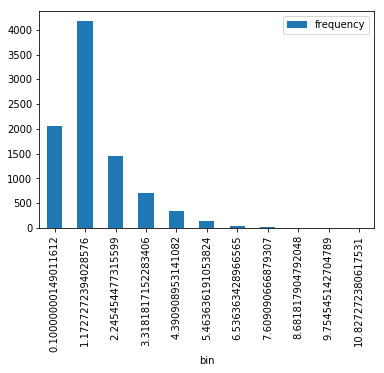

In [81]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*CO_GT_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

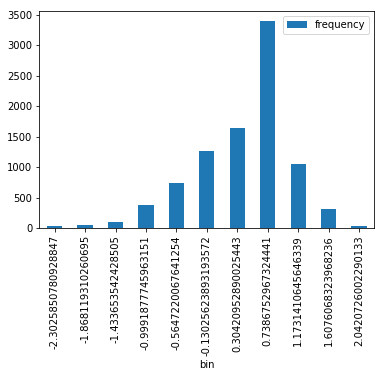

In [82]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*log_CO_GT_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

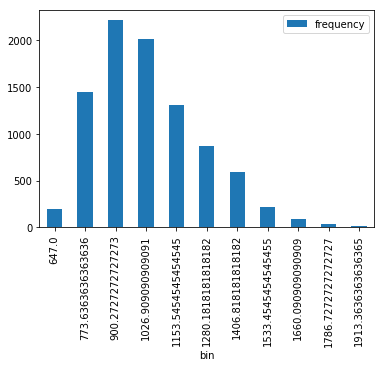

In [83]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*PT08S1_CO_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

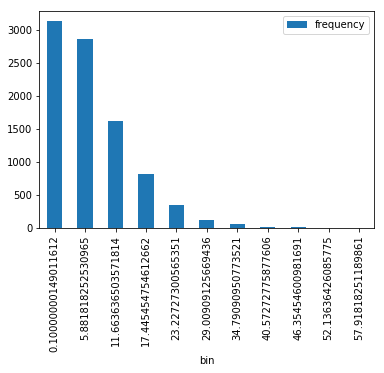

In [84]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*C6H6_GT_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

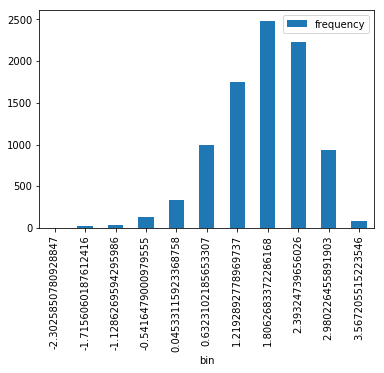

In [85]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*log_C6H6_GT_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

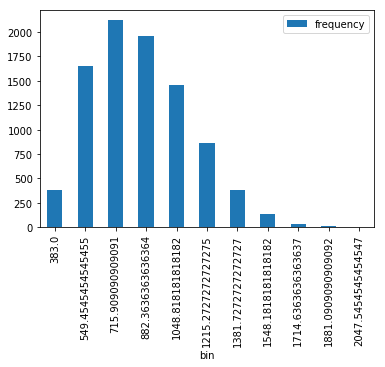

In [86]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*PT08S2_NMHC_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

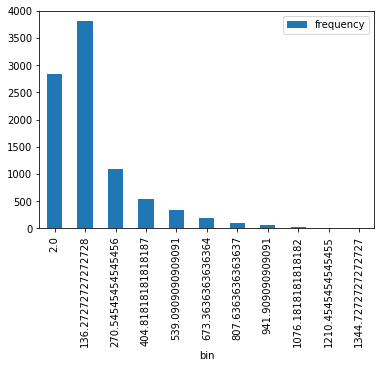

In [87]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*NOx_GT_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

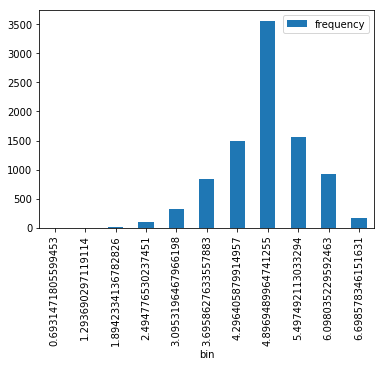

In [88]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*log_NOx_GT_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

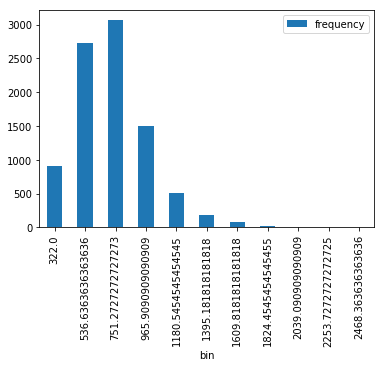

In [89]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*PT08S3_NOx_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

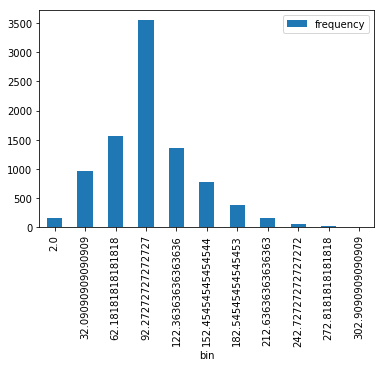

In [90]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*NO2_GT_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

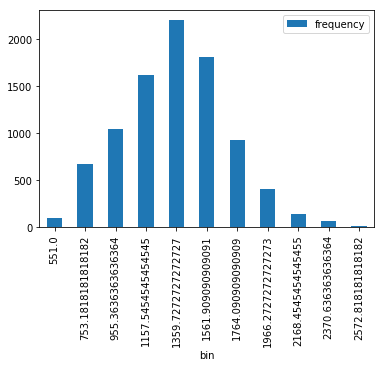

In [91]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*PT08S4_NO2_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

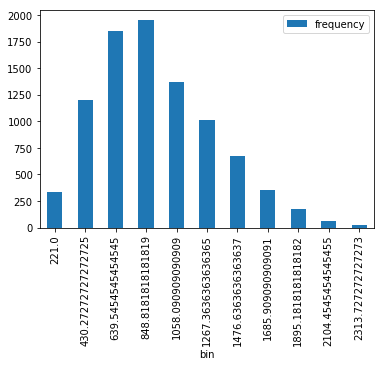

In [92]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*PT08S5_O3_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

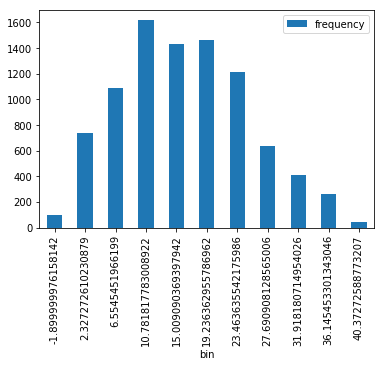

In [93]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*T_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

#### Create final dataset

In [94]:
df_final = df_1.drop('CO(GT)','C6H6(GT)','NOx(GT)')

In [95]:
df_final.toPandas().head()

,month,PT08S1(CO),PT08S2(NMHC),PT08S3(NOx),NO2(GT),PT08S4(NO2),PT08S5(O3),T,log(CO(GT)),log(C6H6(GT),log(NOx(GT))
0,3,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,0.955511,2.476538,5.111988
1,3,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,0.693147,2.240710,4.634729
2,3,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,0.788457,2.197225,4.875197
3,3,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,0.788457,2.219203,5.147494
4,3,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,0.470004,1.871802,4.875197


In [96]:
x = df.toPandas()

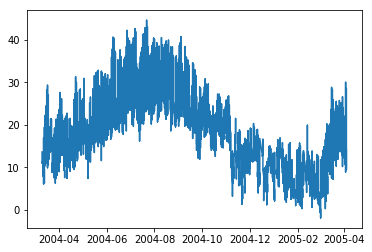

In [97]:
import matplotlib.pyplot as plt
plt.plot(x['Date'],x['T'])

In [98]:
import six
for i in df_final.columns:
    if not( isinstance(df_final.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to T for ", i, df_final.stat.corr('T',i))

Correlation to T for  month 0.2829290925565167
Correlation to T for  PT08S1(CO) 0.048626758354899886
Correlation to T for  PT08S2(NMHC) 0.2413731022716927
Correlation to T for  PT08S3(NOx) -0.1451123996941372
Correlation to T for  NO2(GT) -0.17238147272896032
Correlation to T for  PT08S4(NO2) 0.5612696737600996
Correlation to T for  PT08S5(O3) -0.027172120703795672
Correlation to T for  T 1.0
Correlation to T for  log(CO(GT)) 0.08228635863134082
Correlation to T for  log(C6H6(GT) 0.28986782767410385
Correlation to T for  log(NOx(GT)) -0.2324182759692361


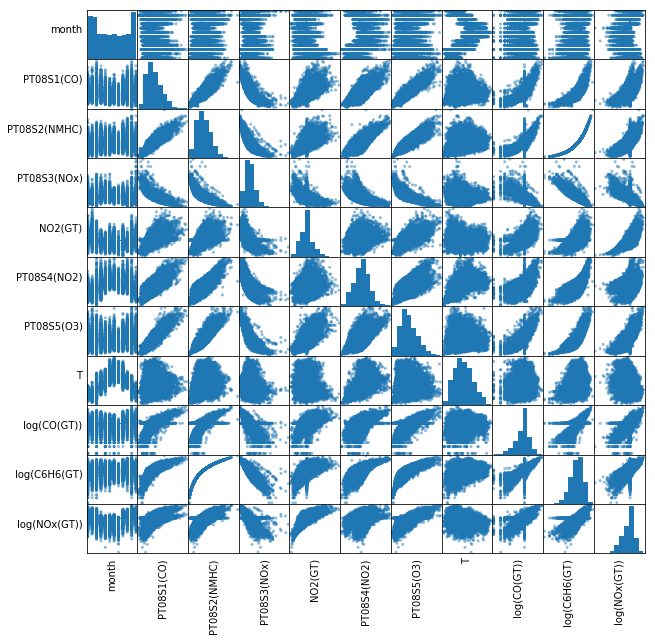

In [99]:
import pandas as pd
numeric_features = [t[0] for t in df_final.dtypes if t[1] == 'float' or t[1] == 'double' or t[1] == 'int']
sampled_data = df_final.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

#### Split data into training and testing set

In [100]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['month',
 'PT08S1(CO)',
 'PT08S2(NMHC)',
 'PT08S3(NOx)',
 'NO2(GT)',
 'PT08S4(NO2)',
 'PT08S5(O3)',
 'log(CO(GT))',
 'log(C6H6(GT)',
 'log(NOx(GT))'], outputCol = 'features')
v_df = vectorAssembler.transform(df_final)
v_df = v_df.select(['features', 'T'])
v_df.show(3)

+--------------------+----+
|            features|   T|
+--------------------+----+
|[3.0,1360.0,1046....|13.6|
|[3.0,1292.0,955.0...|13.3|
|[3.0,1402.0,939.0...|11.9|
+--------------------+----+
only showing top 3 rows



In [101]:
splits = v_df.randomSplit([0.8, 0.2])
train_df = splits[0]
test_df = splits[1]

#### Linear regresion

In [102]:
df_final.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_final.columns]).show()

+-----+----------+------------+-----------+-------+-----------+----------+---+-----------+------------+------------+
|month|PT08S1(CO)|PT08S2(NMHC)|PT08S3(NOx)|NO2(GT)|PT08S4(NO2)|PT08S5(O3)|  T|log(CO(GT))|log(C6H6(GT)|log(NOx(GT))|
+-----+----------+------------+-----------+-------+-----------+----------+---+-----------+------------+------------+
|    0|         0|           0|          0|      0|          0|         0|  0|          0|           0|           0|
+-----+----------+------------+-----------+-------+-----------+----------+---+-----------+------------+------------+



In [103]:
df_final.toPandas()['month']

0       3
1       3
2       3
3       3
4       3
       ..
8986    4
8987    4
8988    4
8989    4
8990    4
Name: month, Length: 8991, dtype: int32

In [104]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='T', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.40977747579902957,-0.010199941807562968,0.0009858894691995843,-0.0031776229148289155,0.02658035952033695,0.01643400551171838,-0.008834208058321599,0.0,3.1351988598985114,-3.1037940314357195]
Intercept: 20.669881465208967


In [105]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 5.457807
r2: 0.619512


In [106]:
train_df.describe().show()

+-------+------------------+
|summary|                 T|
+-------+------------------+
|  count|              7243|
|   mean|18.345409347132993|
| stddev| 8.848663438524955|
|    min|              -1.9|
|    max|              44.6|
+-------+------------------+



In [107]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","T","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="T",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+---+--------------------+
|        prediction|  T|            features|
+------------------+---+--------------------+
| 5.508349779840804|5.5|[1.0,751.0,424.0,...|
|5.9859902174893485|1.0|[1.0,766.0,448.0,...|
| 4.864137148159855|4.1|[1.0,778.0,417.0,...|
|0.8865094270775167|4.0|[1.0,787.0,446.0,...|
| 7.910214508574109|3.9|[1.0,788.0,514.0,...|
+------------------+---+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.640918


In [108]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 5.25068


In [109]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 11
objectiveHistory: [0.49999999999999956, 0.4683951967564092, 0.3062090907459723, 0.2939175257156825, 0.28707869537558256, 0.2712729718933159, 0.2800547420044647, 0.2567840387364382, 0.25611282695360604, 0.2552272794782648, 0.25504793784833935]
+--------------------+
|           residuals|
+--------------------+
|  0.7720881847865755|
| -0.8704787802910836|
|-0.10325944502369921|
| -0.6975758013035929|
|-0.12702940047427447|
|    2.42906713716766|
| 0.13954337670542216|
| -2.0428304059903226|
|   3.973305586652149|
| -0.2306802575542406|
|  2.2952475023750267|
| -2.7441131644777172|
|  -4.392114432251105|
|  -4.283501391403487|
| -1.1018780733304023|
| 0.41147019611498337|
|  -3.510622854687014|
| -0.9187819352846134|
| 0.01392039074942275|
|  1.3733353485885509|
+--------------------+
only showing top 20 rows



In [110]:
CO_GT_histogram = trainingSummary.residuals.rdd.flatMap(lambda x: x).histogram(11)
CO_GT_histogram

([-15.955590174799159,
  -12.62237583652562,
  -9.289161498252081,
  -5.955947159978541,
  -2.622732821705002,
  0.7104815165685388,
  4.043695854842078,
  7.3769101931156165,
  10.710124531389155,
  14.043338869662694,
  17.376553207936237,
  20.709767546209772],
 [19, 162, 665, 1583, 1950, 1368, 776, 421, 179, 87, 33])

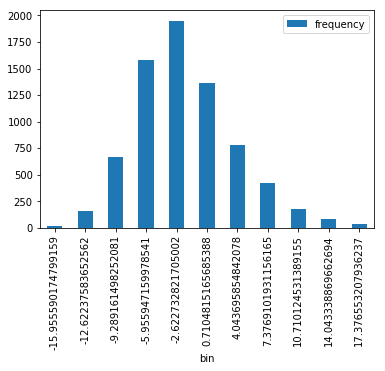

In [111]:
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*CO_GT_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

In [112]:
x = test_df.toPandas()
y= lr_predictions.toPandas()

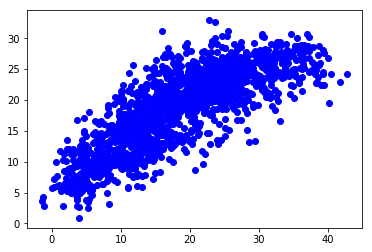

In [113]:
plt.plot(x['T'],y.prediction,'bo')

In [114]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","T","features").show()

+------------------+----+--------------------+
|        prediction|   T|            features|
+------------------+----+--------------------+
| 5.508349779840804| 5.5|[1.0,751.0,424.0,...|
|5.9859902174893485| 1.0|[1.0,766.0,448.0,...|
| 4.864137148159855| 4.1|[1.0,778.0,417.0,...|
|0.8865094270775167| 4.0|[1.0,787.0,446.0,...|
| 7.910214508574109| 3.9|[1.0,788.0,514.0,...|
|2.8118790124214783| 1.6|[1.0,790.0,455.0,...|
|3.8565250876988415| 3.7|[1.0,791.0,435.0,...|
|  5.21238938019135| 4.3|[1.0,801.0,470.0,...|
|   7.9678043264216| 6.4|[1.0,805.0,559.0,...|
| 4.592427950068306| 3.5|[1.0,845.0,534.0,...|
| 7.810632816311209| 3.0|[1.0,861.0,585.0,...|
| 6.913935299006411| 4.6|[1.0,862.0,609.0,...|
| 9.188566171534584|11.9|[1.0,866.0,652.0,...|
| 8.754483706266235|11.0|[1.0,877.0,642.0,...|
| 9.948990327334666| 7.0|[1.0,891.0,666.0,...|
| 9.904635544491068| 5.0|[1.0,892.0,702.0,...|
| 8.522507626022282| 6.0|[1.0,894.0,682.0,...|
| 7.147774487365197| 4.4|[1.0,895.0,648.0,...|
| 9.081484383

#### CART regressor

In [115]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'T')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(train_df)
dt_evaluator = RegressionEvaluator(
    labelCol="T", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on training data = %g" % rmse)

Root Mean Squared Error (RMSE) on training data = 4.60704


In [116]:
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(
    labelCol="T", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 4.71565


In [117]:
dt_model.featureImportances

SparseVector(10, {0: 0.4773, 1: 0.0216, 2: 0.0101, 3: 0.0012, 4: 0.0017, 5: 0.4711, 6: 0.0062, 8: 0.0067, 9: 0.0042})

In [118]:
df_final.take(1)

[Row(month=3, PT08S1(CO)=1360.0, PT08S2(NMHC)=1046.0, PT08S3(NOx)=1056.0, NO2(GT)=113.0, PT08S4(NO2)=1692.0, PT08S5(O3)=1268.0, T=13.600000381469727, log(CO(GT))=0.9555114083476544, log(C6H6(GT)=2.4765383680612034, log(NOx(GT))=5.111987788356544)]

#### Random Forest Regressor

In [119]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

In [120]:
# Automatically identify categorical features, and index them.
# Set maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=12).fit(v_df)

In [121]:
# Split the data into training and test sets (20% held out for testing)
(trainingData, testData) = v_df.randomSplit([0.8, 0.2])

In [122]:
# Train a RandomForest model.
rf = RandomForestRegressor(featuresCol="indexedFeatures",labelCol="T",numTrees= 10,maxDepth= 5)

In [123]:
# Chain indexer and forest in a Pipeline
pipeline = Pipeline(stages=[featureIndexer, rf])

In [124]:
# Train model.  This also runs the indexer.
model = pipeline.fit(trainingData)

In [125]:
# Make predictions on training data.
predictions = model.transform(trainingData)

In [126]:
# Select example rows to display.
predictions.select("prediction", "T", "features").show(5)

+------------------+---+--------------------+
|        prediction|  T|            features|
+------------------+---+--------------------+
|6.4834658227901185|2.7|[1.0,744.0,383.0,...|
|6.4834658227901185|3.3|[1.0,747.0,390.0,...|
|6.4834658227901185|5.5|[1.0,751.0,424.0,...|
| 6.130677699743906|5.7|[1.0,757.0,459.0,...|
| 6.130677699743906|3.3|[1.0,761.0,383.0,...|
+------------------+---+--------------------+
only showing top 5 rows



In [127]:
evaluator = RegressionEvaluator(
    labelCol="T", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on training data = %g" % rmse)


Root Mean Squared Error (RMSE) on training data = 4.16133


In [128]:
rfModel = model.stages[1]
print(rfModel)  # summary only

RandomForestRegressionModel: uid=RandomForestRegressor_a207749f551d, numTrees=10, numFeatures=10


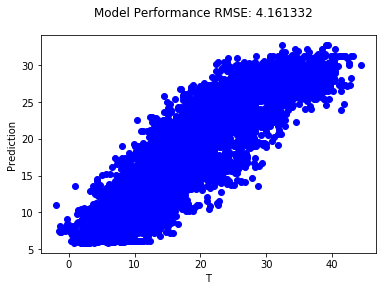

In [129]:
rfResult = predictions.toPandas()

plt.plot(rfResult['T'], rfResult.prediction, 'bo')
plt.xlabel('T')
plt.ylabel('Prediction')
plt.suptitle("Model Performance RMSE: %f" % rmse)
plt.show()

Text(0.5,1,'Feature Importances')

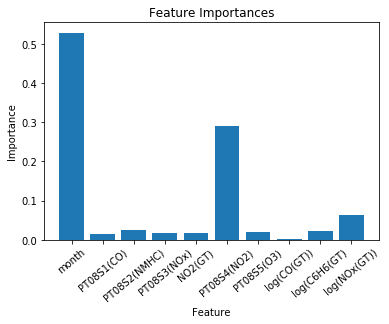

In [130]:
importances = model.stages[1].featureImportances

x_values = list(range(len(importances)))

feature_list = []
for col in df_final.columns:
    if col == 'T':
        continue
    else:
        feature_list.append(col)

plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation=40)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')

+------------------+---+--------------------+
|        prediction|  T|            features|
+------------------+---+--------------------+
|6.4834658227901185|3.7|[1.0,758.0,388.0,...|
|6.4834658227901185|4.3|[1.0,759.0,399.0,...|
|6.4834658227901185|4.1|[1.0,778.0,417.0,...|
| 6.130677699743906|5.9|[1.0,785.0,504.0,...|
| 6.130677699743906|3.9|[1.0,788.0,514.0,...|
+------------------+---+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 4.38669


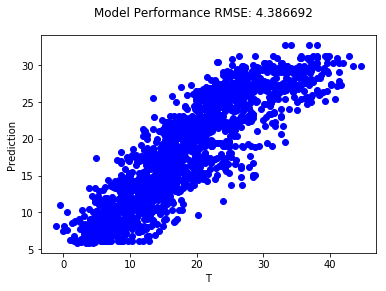

In [131]:
# Make predictions on training data.
predictions = model.transform(testData)
predictions.select("prediction", "T", "features").show(5)
evaluator = RegressionEvaluator(
    labelCol="T", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

rfResult = predictions.toPandas()

plt.plot(rfResult['T'], rfResult.prediction, 'bo')
plt.xlabel('T')
plt.ylabel('Prediction')
plt.suptitle("Model Performance RMSE: %f" % rmse)
plt.show()

#### Gradient boosting regressor

In [132]:
from pyspark.ml.regression import GBTRegressor

In [133]:
# Train a GBT model.
gbt = GBTRegressor(featuresCol="indexedFeatures", labelCol= 'T' , maxIter=10)

In [134]:
# Chain indexer and GBT in a Pipeline
pipeline = Pipeline(stages=[featureIndexer, gbt])

In [135]:
# Train model.  This also runs the indexer.
model = pipeline.fit(trainingData)

In [136]:
# Make predictions.
predictions = model.transform(trainingData)

In [137]:
# Select example rows to display.
predictions.select("prediction", "T", "features").show(5)

+-----------------+---+--------------------+
|       prediction|  T|            features|
+-----------------+---+--------------------+
|3.021002103390749|2.7|[1.0,744.0,383.0,...|
|3.021002103390749|3.3|[1.0,747.0,390.0,...|
|3.021002103390749|5.5|[1.0,751.0,424.0,...|
|3.021002103390749|5.7|[1.0,757.0,459.0,...|
|3.021002103390749|3.3|[1.0,761.0,383.0,...|
+-----------------+---+--------------------+
only showing top 5 rows



In [138]:
# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="T", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on training data = %g" % rmse)


Root Mean Squared Error (RMSE) on training data = 3.48099


In [139]:
gbtModel = model.stages[1]
print(gbtModel)  # summary only

GBTRegressionModel: uid=GBTRegressor_d1bd2ad89208, numTrees=10, numFeatures=10


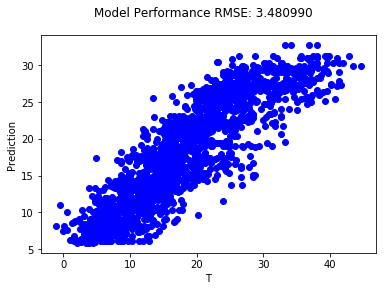

In [140]:
gbtResult = predictions.toPandas()

plt.plot(rfResult['T'], rfResult.prediction, 'bo')
plt.xlabel('T')
plt.ylabel('Prediction')
plt.suptitle("Model Performance RMSE: %f" % rmse)
plt.show()

Text(0.5,1,'Feature Importances')

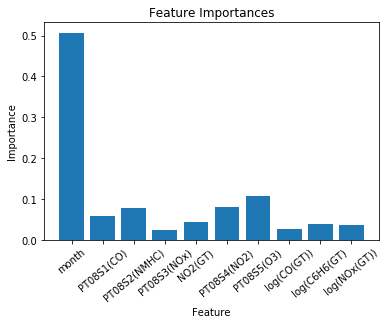

In [141]:
importances = model.stages[1].featureImportances

x_values = list(range(len(importances)))

feature_list = []
for col in df_final.columns:
    if col == 'T':
        continue
    else:
        feature_list.append(col)

plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation=40)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')

+------------------+---+--------------------+
|        prediction|  T|            features|
+------------------+---+--------------------+
| 3.021002103390749|3.7|[1.0,758.0,388.0,...|
| 3.021002103390749|4.3|[1.0,759.0,399.0,...|
|3.3739128882025606|4.1|[1.0,778.0,417.0,...|
| 3.021002103390749|5.9|[1.0,785.0,504.0,...|
| 3.021002103390749|3.9|[1.0,788.0,514.0,...|
+------------------+---+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 3.79664


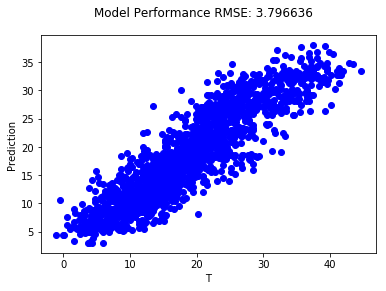

In [142]:
# Make predictions on training data.
predictions = model.transform(testData)
predictions.select("prediction", "T", "features").show(5)
evaluator = RegressionEvaluator(
    labelCol="T", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

rfResult = predictions.toPandas()

plt.plot(rfResult['T'], rfResult.prediction, 'bo')
plt.xlabel('T')
plt.ylabel('Prediction')
plt.suptitle("Model Performance RMSE: %f" % rmse)
plt.show()

In [143]:
print('The training data set has')
print(trainingData.count())
print('The testing data set has')
print(testData.count())

The training data set has
7210
The testing data set has
1781


#### Perform data mining

In [144]:
# Train a GBT model.
gbt = GBTRegressor(featuresCol="indexedFeatures", labelCol= 'T' , maxIter=100)

# Chain indexer and GBT in a Pipeline
pipeline = Pipeline(stages=[featureIndexer, gbt])

# Train model.  This also runs the indexer.
model = pipeline.fit(trainingData)


gbtModel = model.stages[1]
print(gbtModel)  # summary only

GBTRegressionModel: uid=GBTRegressor_657350fbc8e6, numTrees=100, numFeatures=10


In [145]:
# Make predictions.
predictions = model.transform(trainingData)

# Select example rows to display.
predictions.select("prediction", "T", "features").show(10)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="T", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on training data = %g" % rmse)

+------------------+---+--------------------+
|        prediction|  T|            features|
+------------------+---+--------------------+
| 3.369146718730518|2.7|[1.0,744.0,383.0,...|
| 3.369146718730518|3.3|[1.0,747.0,390.0,...|
| 3.369146718730518|5.5|[1.0,751.0,424.0,...|
| 3.957064787918162|5.7|[1.0,757.0,459.0,...|
|3.2059074834834025|3.3|[1.0,761.0,383.0,...|
|3.5949552615196256|3.9|[1.0,762.0,434.0,...|
| 3.369146718730518|3.9|[1.0,763.0,428.0,...|
|2.9563834581403707|4.5|[1.0,766.0,412.0,...|
| 2.772494473681241|1.0|[1.0,766.0,448.0,...|
| 3.369146718730518|4.4|[1.0,769.0,412.0,...|
+------------------+---+--------------------+
only showing top 10 rows

Root Mean Squared Error (RMSE) on training data = 2.28098


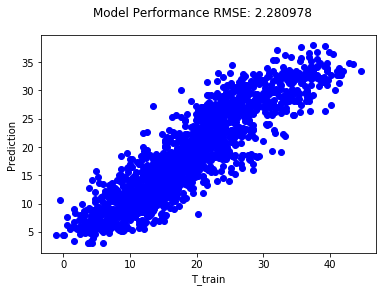

In [146]:
gbtResult = predictions.toPandas()

plt.plot(rfResult['T'], rfResult.prediction, 'bo')
plt.xlabel('T_train')
plt.ylabel('Prediction')
plt.suptitle("Model Performance RMSE: %f" % rmse)
plt.show()


In [147]:
# Make predictions on training data.
predictions = model.transform(testData)
predictions.select("prediction", "T", "features").show(10)
evaluator = RegressionEvaluator(
    labelCol="T", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)


+------------------+---+--------------------+
|        prediction|  T|            features|
+------------------+---+--------------------+
| 3.369146718730518|3.7|[1.0,758.0,388.0,...|
| 3.369146718730518|4.3|[1.0,759.0,399.0,...|
|2.7536611016308012|4.1|[1.0,778.0,417.0,...|
|3.2142481387145527|5.9|[1.0,785.0,504.0,...|
|3.2491720351936064|3.9|[1.0,788.0,514.0,...|
|2.3960467289264167|1.6|[1.0,790.0,455.0,...|
| 5.009637836852375|1.9|[1.0,793.0,480.0,...|
| 4.709227136696267|2.7|[1.0,805.0,465.0,...|
|4.5716150647647815|6.4|[1.0,805.0,559.0,...|
| 4.633002183625626|3.7|[1.0,814.0,449.0,...|
+------------------+---+--------------------+
only showing top 10 rows

Root Mean Squared Error (RMSE) on test data = 3.12977


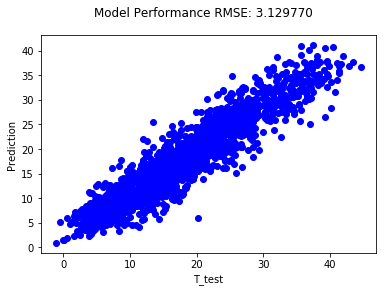

In [148]:
rfResult = predictions.toPandas()

plt.plot(rfResult['T'], rfResult.prediction, 'bo')
plt.xlabel('T_test')
plt.ylabel('Prediction')
plt.suptitle("Model Performance RMSE: %f" % rmse)
plt.show()

Text(0.5,1,'Feature Importances')

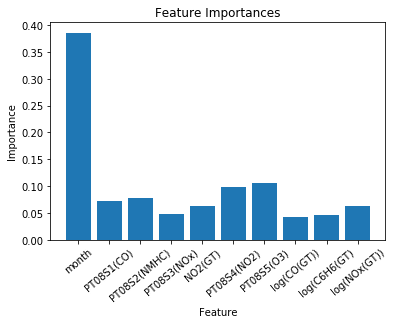

In [149]:
importances = model.stages[1].featureImportances

x_values = list(range(len(importances)))

feature_list = []
for col in df_final.columns:
    if col == 'T':
        continue
    else:
        feature_list.append(col)

plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation=40)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')

In [150]:
trainingData.show()

+--------------------+---+
|            features|  T|
+--------------------+---+
|[1.0,744.0,383.0,...|2.7|
|[1.0,747.0,390.0,...|3.3|
|[1.0,751.0,424.0,...|5.5|
|[1.0,757.0,459.0,...|5.7|
|[1.0,761.0,383.0,...|3.3|
|[1.0,762.0,434.0,...|3.9|
|[1.0,763.0,428.0,...|3.9|
|[1.0,766.0,412.0,...|4.5|
|[1.0,766.0,448.0,...|1.0|
|[1.0,769.0,412.0,...|4.4|
|[1.0,771.0,410.0,...|3.0|
|[1.0,774.0,441.0,...|2.8|
|[1.0,774.0,458.0,...|1.4|
|[1.0,776.0,445.0,...|1.4|
|[1.0,787.0,415.0,...|3.4|
|[1.0,787.0,446.0,...|4.0|
|[1.0,788.0,487.0,...|4.0|
|[1.0,790.0,431.0,...|2.8|
|[1.0,791.0,435.0,...|3.7|
|[1.0,791.0,459.0,...|6.6|
+--------------------+---+
only showing top 20 rows



In [151]:
df_final.toPandas().head(10)

,month,PT08S1(CO),PT08S2(NMHC),PT08S3(NOx),NO2(GT),PT08S4(NO2),PT08S5(O3),T,log(CO(GT)),log(C6H6(GT),log(NOx(GT))
0,3,1360.0,1046.0,1056.0,113.000000,1692.0,1268.0,13.6,0.955511,2.476538,5.111988
1,3,1292.0,955.0,1174.0,92.000000,1559.0,972.0,13.3,0.693147,2.240710,4.634729
2,3,1402.0,939.0,1140.0,114.000000,1555.0,1074.0,11.9,0.788457,2.197225,4.875197
3,3,1376.0,948.0,1092.0,122.000000,1584.0,1203.0,11.0,0.788457,2.219203,5.147494
4,3,1272.0,836.0,1205.0,116.000000,1490.0,1110.0,11.2,0.470004,1.871802,4.875197
5,3,1197.0,750.0,1337.0,96.000000,1393.0,949.0,11.2,0.182322,1.547562,4.488636
6,3,1185.0,690.0,1462.0,77.000000,1333.0,733.0,11.3,0.182322,1.280934,4.127134
7,3,1136.0,672.0,1453.0,76.000000,1333.0,730.0,10.7,0.000000,1.193922,4.127134
8,3,1094.0,609.0,1579.0,60.000000,1276.0,620.0,10.7,-0.105361,0.832909,3.806662
9,3,1010.0,561.0,1705.0,112.145134,1235.0,501.0,10.3,-0.510826,0.530628,5.489720


In [152]:
testData.show()

+--------------------+----+
|            features|   T|
+--------------------+----+
|[1.0,758.0,388.0,...| 3.7|
|[1.0,759.0,399.0,...| 4.3|
|[1.0,778.0,417.0,...| 4.1|
|[1.0,785.0,504.0,...| 5.9|
|[1.0,788.0,514.0,...| 3.9|
|[1.0,790.0,455.0,...| 1.6|
|[1.0,793.0,480.0,...| 1.9|
|[1.0,805.0,465.0,...| 2.7|
|[1.0,805.0,559.0,...| 6.4|
|[1.0,814.0,449.0,...| 3.7|
|[1.0,819.0,576.0,...|11.4|
|[1.0,822.0,493.0,...| 7.1|
|[1.0,827.0,533.0,...| 4.6|
|[1.0,828.0,514.0,...| 8.1|
|[1.0,837.0,512.0,...| 3.7|
|[1.0,841.0,625.0,...| 9.0|
|[1.0,843.0,520.0,...| 3.3|
|[1.0,849.0,552.0,...| 3.1|
|[1.0,859.0,581.0,...| 2.7|
|[1.0,861.0,585.0,...| 3.0|
+--------------------+----+
only showing top 20 rows



In [153]:
df_final.toPandas().tail(10)

,month,PT08S1(CO),PT08S2(NMHC),PT08S3(NOx),NO2(GT),PT08S4(NO2),PT08S5(O3),T,log(CO(GT)),log(C6H6(GT),log(NOx(GT))
8981,4,888.0,528.0,1077.0,53.0,987.0,578.0,10.400000,-0.693147,0.262364,4.343805
8982,4,1031.0,730.0,760.0,93.0,1129.0,905.0,9.500000,0.095310,1.481605,5.204007
8983,4,1384.0,1221.0,470.0,155.0,1600.0,1457.0,9.700000,1.386294,2.856470,6.386879
8984,4,1446.0,1362.0,415.0,174.0,1777.0,1705.0,13.500000,1.609438,3.109061,6.373320
8985,4,1297.0,1102.0,507.0,187.0,1375.0,1583.0,18.200001,1.360977,2.610070,6.259581
8986,4,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.900000,1.131402,2.602690,6.156979
8987,4,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.299999,0.875469,2.433613,5.866468
8988,4,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.900000,0.875469,2.517696,5.680173
8989,4,1003.0,961.0,702.0,156.0,1041.0,770.0,28.299999,0.741937,2.251292,5.459586
8990,4,1071.0,1047.0,654.0,168.0,1129.0,816.0,28.500000,0.788457,2.476538,5.579730


In [154]:
importances

SparseVector(10, {0: 0.3859, 1: 0.0729, 2: 0.0769, 3: 0.0473, 4: 0.0621, 5: 0.0987, 6: 0.1048, 7: 0.0417, 8: 0.0465, 9: 0.0633})

In [155]:
feature_list

['month',
 'PT08S1(CO)',
 'PT08S2(NMHC)',
 'PT08S3(NOx)',
 'NO2(GT)',
 'PT08S4(NO2)',
 'PT08S5(O3)',
 'log(CO(GT))',
 'log(C6H6(GT)',
 'log(NOx(GT))']

#### Iteration 1, 50 trees

In [156]:
# Train a GBT model.
gbt = GBTRegressor(featuresCol="indexedFeatures", labelCol= 'T' , maxIter=50)

# Chain indexer and GBT in a Pipeline
pipeline = Pipeline(stages=[featureIndexer, gbt])

# Train model.  This also runs the indexer.
model = pipeline.fit(trainingData)

gbtModel = model.stages[1]
print(gbtModel)  # summary only

GBTRegressionModel: uid=GBTRegressor_27c29d32dfc3, numTrees=50, numFeatures=10


In [157]:
# Make predictions.
predictions = model.transform(trainingData)

# Select example rows to display.
predictions.select("prediction", "T", "features").show(10)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="T", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on training data = %g" % rmse)

+------------------+---+--------------------+
|        prediction|  T|            features|
+------------------+---+--------------------+
|  3.15770771639296|2.7|[1.0,744.0,383.0,...|
|  3.15770771639296|3.3|[1.0,747.0,390.0,...|
|  3.15770771639296|5.5|[1.0,751.0,424.0,...|
|3.7158648282523847|5.7|[1.0,757.0,459.0,...|
|  3.15770771639296|3.3|[1.0,761.0,383.0,...|
| 3.388679198332902|3.9|[1.0,762.0,434.0,...|
|  3.15770771639296|3.9|[1.0,763.0,428.0,...|
| 2.761456338448494|4.5|[1.0,766.0,412.0,...|
| 3.130414817517075|1.0|[1.0,766.0,448.0,...|
|  3.15770771639296|4.4|[1.0,769.0,412.0,...|
+------------------+---+--------------------+
only showing top 10 rows

Root Mean Squared Error (RMSE) on training data = 2.68399


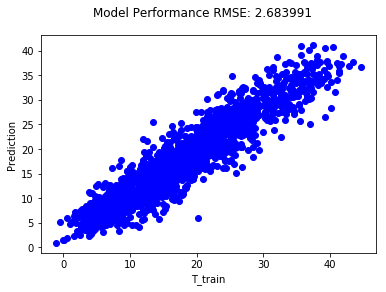

In [158]:
gbtResult = predictions.toPandas()

plt.plot(rfResult['T'], rfResult.prediction, 'bo')
plt.xlabel('T_train')
plt.ylabel('Prediction')
plt.suptitle("Model Performance RMSE: %f" % rmse)
plt.show()


In [159]:
# Make predictions on training data.
predictions = model.transform(testData)
predictions.select("prediction", "T", "features").show(10)
evaluator = RegressionEvaluator(
    labelCol="T", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

+------------------+---+--------------------+
|        prediction|  T|            features|
+------------------+---+--------------------+
|  3.15770771639296|3.7|[1.0,758.0,388.0,...|
|  3.15770771639296|4.3|[1.0,759.0,399.0,...|
|  2.94834221021952|4.1|[1.0,778.0,417.0,...|
| 3.093592002184252|5.9|[1.0,785.0,504.0,...|
| 3.093592002184252|3.9|[1.0,788.0,514.0,...|
|2.4008271393324567|1.6|[1.0,790.0,455.0,...|
| 5.034434562480335|1.9|[1.0,793.0,480.0,...|
| 5.034434562480335|2.7|[1.0,805.0,465.0,...|
| 5.079909888650121|6.4|[1.0,805.0,559.0,...|
| 4.883542261542549|3.7|[1.0,814.0,449.0,...|
+------------------+---+--------------------+
only showing top 10 rows

Root Mean Squared Error (RMSE) on test data = 3.30923


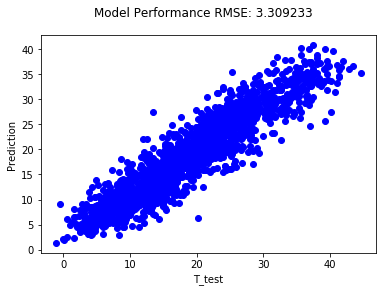

In [160]:
rfResult = predictions.toPandas()

plt.plot(rfResult['T'], rfResult.prediction, 'bo')
plt.xlabel('T_test')
plt.ylabel('Prediction')
plt.suptitle("Model Performance RMSE: %f" % rmse)
plt.show()

Text(0.5,1,'Feature Importances')

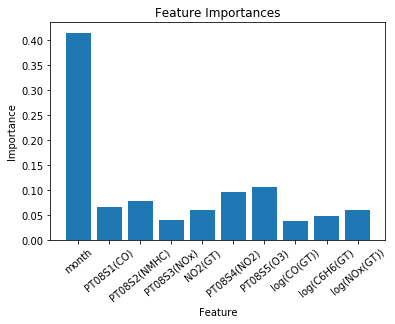

In [161]:
importances = model.stages[1].featureImportances

x_values = list(range(len(importances)))

feature_list = []
for col in df_final.columns:
    if col == 'T':
        continue
    else:
        feature_list.append(col)

plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation=40)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')

#### Iteration 2, 200 trees

In [162]:
# Train a GBT model.
gbt = GBTRegressor(featuresCol="indexedFeatures", labelCol= 'T' , maxIter=200)

# Chain indexer and GBT in a Pipeline
pipeline = Pipeline(stages=[featureIndexer, gbt])

# Train model.  This also runs the indexer.
model = pipeline.fit(trainingData)

gbtModel = model.stages[1]
print(gbtModel)  # summary only


GBTRegressionModel: uid=GBTRegressor_3ec23ceab26e, numTrees=200, numFeatures=10


In [163]:
# Make predictions.
predictions = model.transform(trainingData)

# Select example rows to display.
predictions.select("prediction", "T", "features").show(10)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="T", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on training data = %g" % rmse)

+------------------+---+--------------------+
|        prediction|  T|            features|
+------------------+---+--------------------+
|3.5946318913395015|2.7|[1.0,744.0,383.0,...|
|3.5946318913395015|3.3|[1.0,747.0,390.0,...|
|3.5946318913395015|5.5|[1.0,751.0,424.0,...|
| 4.177378057327021|5.7|[1.0,757.0,459.0,...|
| 3.431392656092386|3.3|[1.0,761.0,383.0,...|
|3.5680117465197214|3.9|[1.0,762.0,434.0,...|
|3.5946318913395015|3.9|[1.0,763.0,428.0,...|
|3.2407489022399276|4.5|[1.0,766.0,412.0,...|
| 2.410068050754383|1.0|[1.0,766.0,448.0,...|
|3.5946318913395015|4.4|[1.0,769.0,412.0,...|
+------------------+---+--------------------+
only showing top 10 rows

Root Mean Squared Error (RMSE) on training data = 1.82373


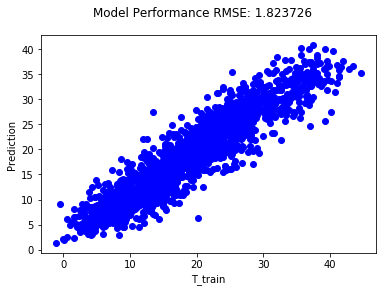

In [164]:
gbtResult = predictions.toPandas()

plt.plot(rfResult['T'], rfResult.prediction, 'bo')
plt.xlabel('T_train')
plt.ylabel('Prediction')
plt.suptitle("Model Performance RMSE: %f" % rmse)
plt.show()

In [165]:
# Make predictions on training data.
predictions = model.transform(testData)
predictions.select("prediction", "T", "features").show(10)
evaluator = RegressionEvaluator(
    labelCol="T", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)


+------------------+---+--------------------+
|        prediction|  T|            features|
+------------------+---+--------------------+
|3.5946318913395015|3.7|[1.0,758.0,388.0,...|
|3.5946318913395015|4.3|[1.0,759.0,399.0,...|
|2.3207040367801723|4.1|[1.0,778.0,417.0,...|
|  2.99548113629507|5.9|[1.0,785.0,504.0,...|
| 3.068491263857579|3.9|[1.0,788.0,514.0,...|
| 2.158983587308632|1.6|[1.0,790.0,455.0,...|
| 4.461936913393646|1.9|[1.0,793.0,480.0,...|
| 4.161526213237538|2.7|[1.0,805.0,465.0,...|
| 4.534330496968956|6.4|[1.0,805.0,559.0,...|
| 4.140460793770375|3.7|[1.0,814.0,449.0,...|
+------------------+---+--------------------+
only showing top 10 rows

Root Mean Squared Error (RMSE) on test data = 3.02646


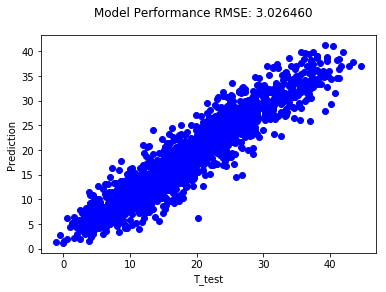

In [166]:
rfResult = predictions.toPandas()

plt.plot(rfResult['T'], rfResult.prediction, 'bo')
plt.xlabel('T_test')
plt.ylabel('Prediction')
plt.suptitle("Model Performance RMSE: %f" % rmse)
plt.show()

Text(0.5,1,'Feature Importances')

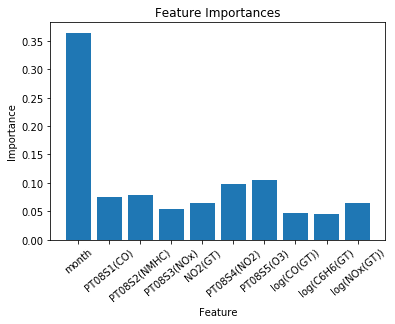

In [167]:
importances = model.stages[1].featureImportances

x_values = list(range(len(importances)))

feature_list = []
for col in df_final.columns:
    if col == 'T':
        continue
    else:
        feature_list.append(col)

plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation=40)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')